In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [14]:
NUM_EPOCHS = 3
MODEL = 'model_v2'

epochs = [0.19,
          0.37,
          0.56,
          0.74,
          0.93,
          1.00]

path = f'/content/drive/MyDrive/Text-Mining/{MODEL}/epoch'

In [15]:
train_epochs = []
eval_epochs = []
train_losses = []
eval_losses = []

for i in range(NUM_EPOCHS):
    p = path + str(i + 1)
    with open(p + '/trainer_state.json') as json_file:
        data = json.load(json_file)
        for d in data['log_history']:
            try:
                l = d['loss']
                train_losses.append(l)
            except KeyError:
                try:
                    l = d['eval_loss']
                    eval_losses.append(l)
                except KeyError:
                    pass
    for e in epochs:
        if not e == 1.0:
            train_epochs.append(round(e + i, 2))
            eval_epochs.append(round(e + i, 2))

In [16]:
print(len(train_losses))

15


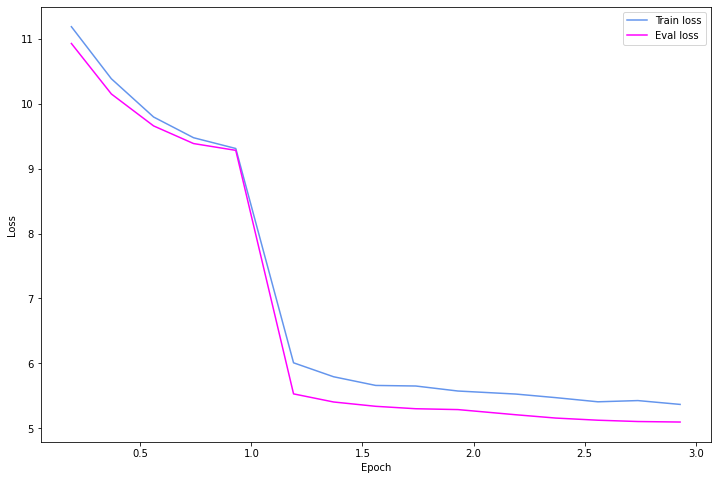

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(train_epochs, train_losses, color='cornflowerblue')
plt.plot(eval_epochs, eval_losses, color='magenta')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train loss', 'Eval loss'])
plt.show()